<a href="https://colab.research.google.com/github/dil150898/Airbnb-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = ('/content/drive/MyDrive/Capstone Project/Airbnb/Dil khush Sharma/Airbnb NYC 2019.csv')
df = pd.read_csv(file_path)


In [5]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#here we can observe that the top Ten busiest host



In [8]:
most_not_available_host = df[df['availability_365']==0].groupby(['host_id','host_name','neighbourhood_group','neighbourhood','price']).size().sort_values(ascending=False).reset_index(name='most_busy').head(10)
most_not_available_host

,host_id,host_name,neighbourhood_group,neighbourhood,price,most_busy
0,100238132,Michael,Manhattan,Midtown,339,9
1,732460,Nôm,Brooklyn,Williamsburg,120,6
2,193502084,Linda,Brooklyn,Borough Park,40,5
3,232578558,Nick & D.,Brooklyn,East Flatbush,48,4
4,22959695,Gurpreet Singh,Queens,Richmond Hill,50,4
5,180212824,Samet,Manhattan,Upper East Side,99,3
6,24831061,Hosteeva,Manhattan,Midtown,310,3
7,89388277,Maria,Manhattan,Lower East Side,118,3
8,51913826,The Bowery House,Manhattan,Nolita,84,3
9,236659049,Yesenia,Brooklyn,Bushwick,40,3


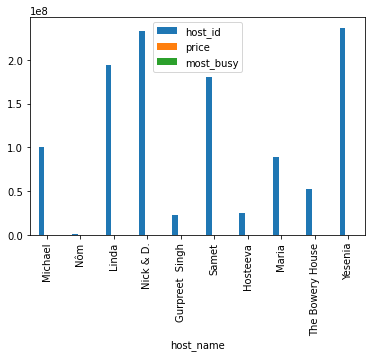

In [10]:
most_not_available_host.plot.bar(x='host_name')

In [11]:
most_not_available_room_type = df[df['availability_365']==0].groupby(['room_type']).size().sort_values(ascending=False).reset_index(name='not_available').head()
most_not_available_room_type

,room_type,not_available
0,Entire home/apt,8876
1,Private room,8361
2,Shared room,296


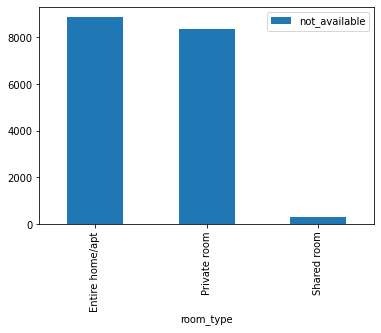

In [12]:
most_not_available_room_type.plot.bar(x='room_type')

In [13]:
most_not_available_neighbourhood = df[df['availability_365']==0].groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='not_available').head(10)
most_not_available_neighbourhood


,neighbourhood,not_available
0,Williamsburg,1868
1,Bedford-Stuyvesant,1232
2,Bushwick,1016
3,Harlem,924
4,East Village,896
5,Upper West Side,882
6,Upper East Side,703
7,Crown Heights,652
8,Greenpoint,530
9,Hell's Kitchen,512


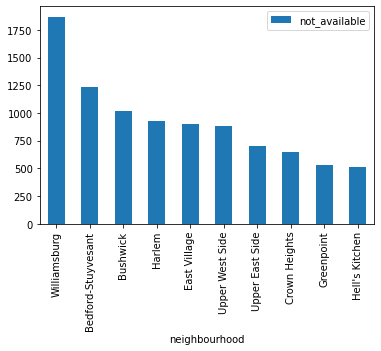

In [14]:
most_not_available_neighbourhood.plot.bar(x='neighbourhood')

In [15]:
most_not_available_neighbourhood_group = df[df['availability_365']==0].groupby(['neighbourhood_group']).size().sort_values(ascending=False).reset_index(name='not_available').head()
most_not_available_neighbourhood_group

,neighbourhood_group,not_available
0,Manhattan,8102
1,Brooklyn,7844
2,Queens,1368
3,Bronx,177
4,Staten Island,42


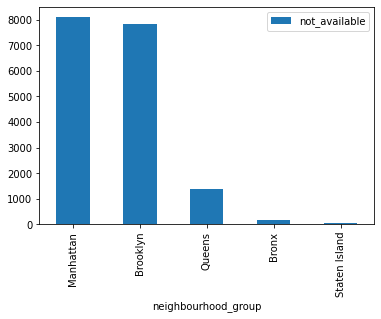

In [16]:
most_not_available_neighbourhood_group.plot.bar(x='neighbourhood_group')

In [ ]:
df[df['neighbourhood_group']=='Manhattan'].groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='not_available').head(10)

,neighbourhood,not_available
0,Harlem,2658
1,Upper West Side,1971
2,Hell's Kitchen,1958
3,East Village,1853
4,Upper East Side,1798
5,Midtown,1545
6,East Harlem,1117
7,Chelsea,1113
8,Lower East Side,911
9,Washington Heights,899


In [ ]:
asd=df.loc[ (df.room_type=='Entire home/apt') & (df.price==0),'price']=df.loc[ (df.room_type=='Entire home/apt') & (df.price!=0),'price'].median()
asd

160.0

In [ ]:

df[df['neighbourhood_group']=='Manhattan'].groupby(['price']).size().sort_values(ascending=False).reset_index(name='not_available').head(10)


,price,not_available
0,150,1052
1,100,885
2,200,819
3,250,647
4,120,503
5,125,475
6,80,463
7,175,443
8,75,426
9,90,423


In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#most_not_available_room_type.plot.bar('host_name','most_busy',color='green')

In [ ]:
df[df['availability_365']==0].groupby(['price','not_available']).size().reset_index().head()


In [ ]:
"""z=df[df['host_name']=='Michael'].groupby(['room_type']).size().reset_index()
l=df[df['host_name']=='David'].groupby(['room_type']).size().reset_index()
k=df[df['host_name']=='Sarah'].groupby(['room_type']).size().reset_index()
j=df[df['host_name']=='Daniel'].groupby(['room_type']).size().reset_index()
h=df[df['host_name']=='Alex'].groupby(['room_type']).size().reset_index()
g=df[df['host_name']=='Andrew'].groupby(['room_type']).size().reset_index()
f=df[df['host_name']=='Jessica'].groupby(['room_type']).size().reset_index()
d=df[df['host_name']=='John'].groupby(['room_type']).size().reset_index()
s=df[df['host_name']=='Lauren'].groupby(['room_type']).size().reset_index()
a=df[df['host_name']=='Laura'].groupby(['room_type']).size().reset_index()"""